In [29]:
import cv2
import numpy as np
import importlib
import utils.images as img
import utils.vectors as vec
import detector as det
def lmap(fun, l):
    return list(map(fun,l))
names = ['fountain_dense/urd/000'+str(i)+'.png' for i in range(5)]
photos = [img.load_gray(n) for n in names]
cphotos = [img.load_color(n) for n in names]

In [23]:
imA = photos[2]
imB = photos[3]
cimA = cphotos[2]
cimB = cphotos[3]

In [124]:
sift = cv2.xfeatures2d.SIFT_create(20000)
kp0, des0 = sift.detectAndCompute(imA.astype('uint8'),None)
kp1, des1 = sift.detectAndCompute(imB.astype('uint8'),None)
match = det.nndm(des0, des1, 6000)
pt0 = (lmap(lambda x: (x.pt[1], x.pt[0]), kp0))
pt1 = (lmap(lambda x:  (x.pt[1], x.pt[0]), kp1))

fcorn0 = []
fcorn1 = []
i = 0
hp0 = []
hp1 = []
for m in match:
    if m > 0 and m !=9:
        fcorn0.append((pt0[m], 1))
        fcorn1.append((pt1[i], 1))
        hp0.append([*pt0[m], 1]))
        hp1.append([*pt1[i], 1]))
        print(pt0[m], pt1[i])
    i+=1

SyntaxError: invalid syntax (<ipython-input-124-2fee3a633772>, line 17)

(2048, 3072, 3) (2048, 3072, 3)


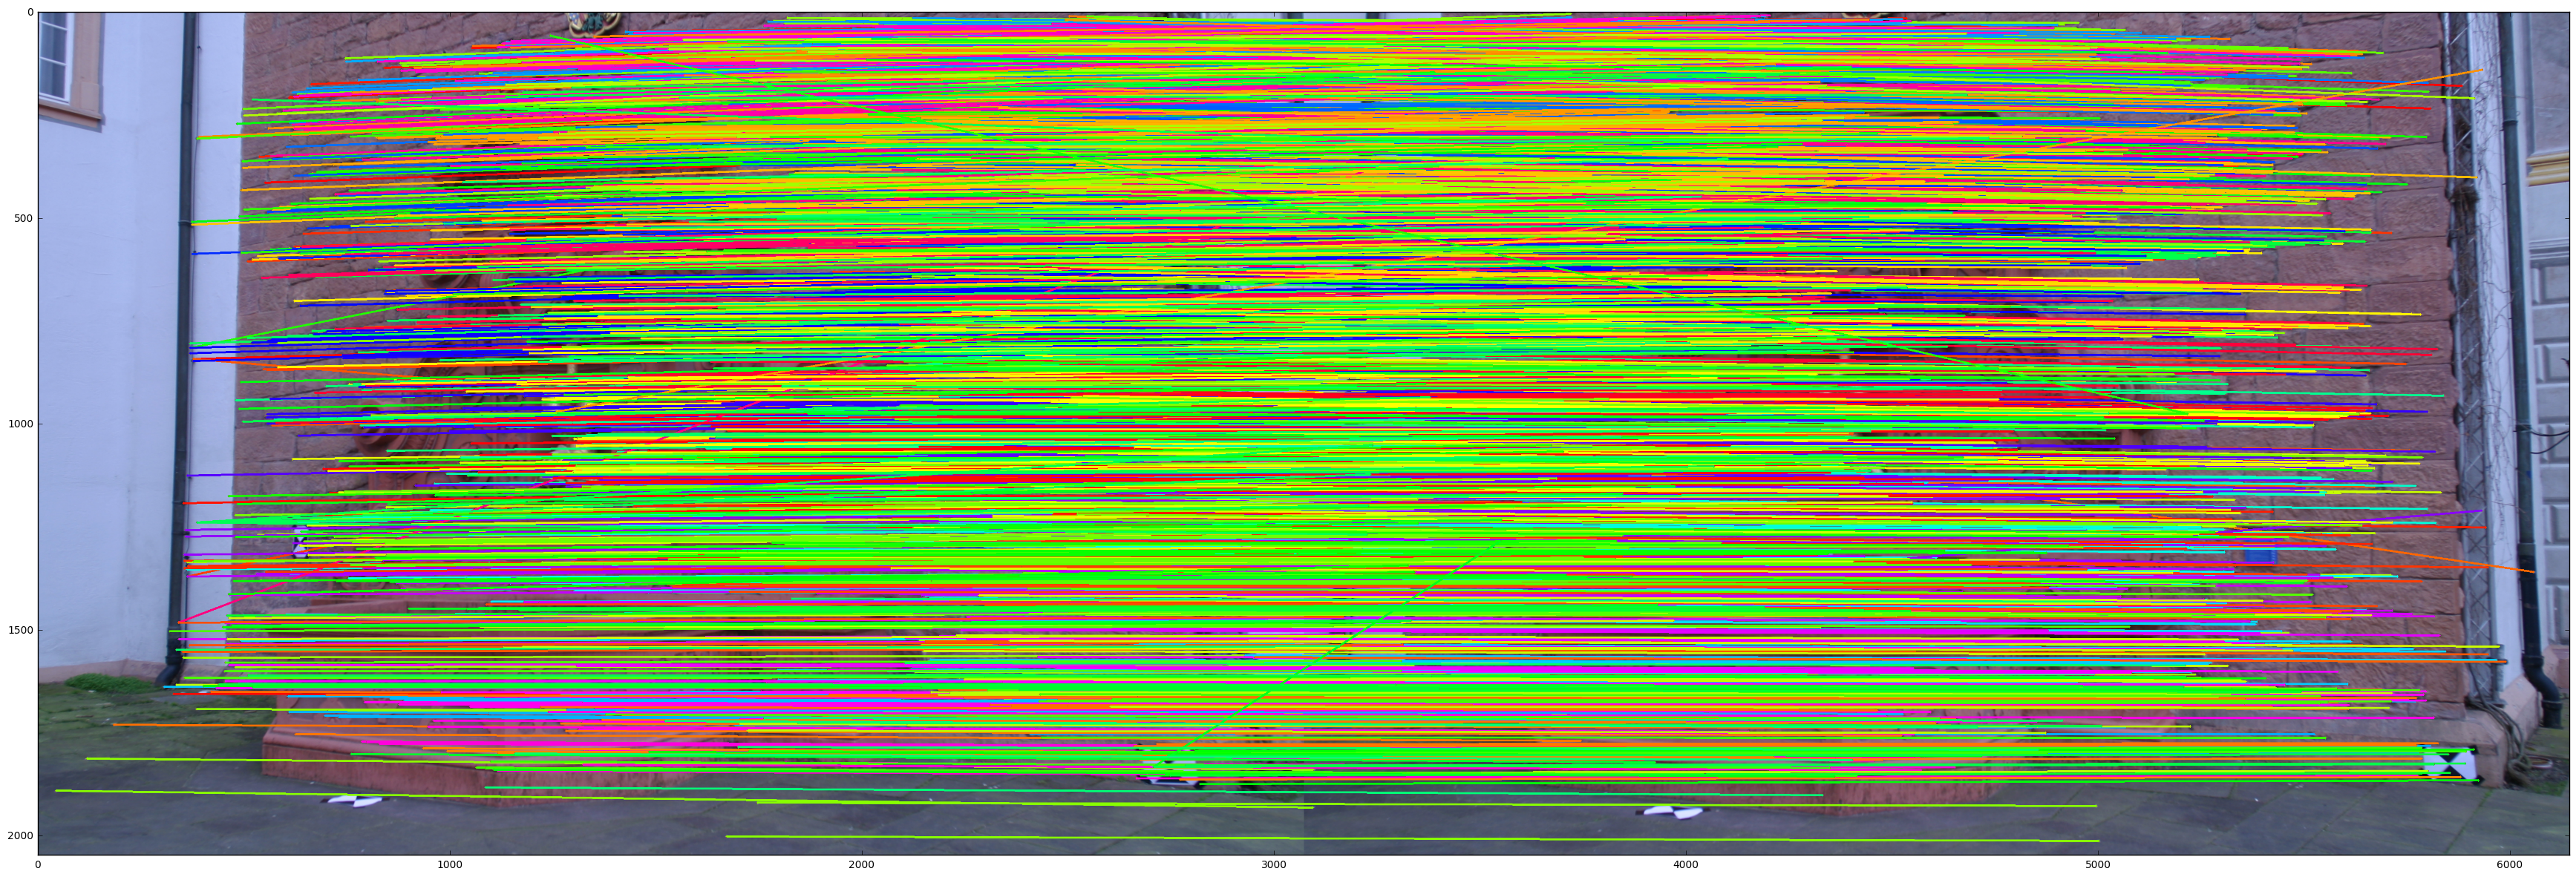

In [125]:
import utils.images
importlib.reload(utils.images)
import utils.images as img
colors = list(map(lambda x: cv2.applyColorMap(x, cv2.COLORMAP_HSV), np.arange(len(fcorn0))/len(fcorn0)))
colors = cv2.cvtColor(np.array([[[255*h/len(fcorn0), 255, 255] for h in np.arange(len(fcorn0))]]).astype('uint8'), cv2.COLOR_HSV2RGB)[0]
img.show_correspondences(cimA, cimB, fcorn0, fcorn1, colors)

In [126]:
hp0 = []
hp1 = []
i = 0
for m in match:
    if m > 0 and m !=9:
        hp0.append([*pt0[m], 1])
        hp1.append([*pt1[i], 1])
    i+=1
hp0 = np.array(hp0)
hp1 = np.array(hp1)

In [127]:
import ransac
importlib.reload(ransac)
import matrices.essential
importlib.reload(matrices.essential)
import utils.vectors
importlib.reload(utils.vectors)
ransac.essential(hp0, hp1, 300)

No.
[1348 1072 1669 1170  493  964 1617   88]
E:
[[ -4.25689244e-04  -2.76377424e-02  -7.05166713e-01]
 [  1.63890298e-01  -9.04401067e-03   4.13402733e-02]
 [  6.86178328e-01  -4.49881147e-02  -8.46231904e-03]]
Outliers:  1995

No.
[1233 1418 1264 1910 1573  299  789   98]
E:
[[ 0.01838532 -0.57739337  0.40474609]
 [ 0.58395012  0.00304898 -0.01394552]
 [-0.39514483 -0.01039153  0.01528004]]
Outliers:  346

No.
[1115  274  356  498  966  599 1535 1074]
E:
[[  2.13534662e-02   5.82199065e-01  -3.87354037e-01]
 [ -5.86714369e-01   1.96210478e-02  -1.03236644e-01]
 [  3.83698596e-01   8.86634530e-02  -5.84653991e-04]]
Outliers:  317

No.
[ 795 1931  722 1204  535 1548  422 1605]
E:
[[  3.87442472e-03   8.44422475e-02  -7.01480550e-01]
 [  3.81027627e-02  -3.80606424e-03   2.06881068e-02]
 [  7.05410457e-01  -2.42658057e-02  -1.59160253e-04]]
Outliers:  1970

No.
[1089 1990   11 1201  291   33 1607  668]
E:
[[ -1.91297107e-02   2.44128969e-01  -6.61709268e-01]
 [ -1.59310043e-01   1.55439

array([[  8.96418494e-03,   7.05312630e-01,   1.90832843e-02],
       [ -7.05397633e-01,   8.30106436e-03,   2.56936238e-02],
       [ -1.34036768e-03,  -2.01185866e-02,  -5.05181195e-04]])